In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv('crime.csv', encoding='latin-1')

In [3]:
dt.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
cd=pd.read_csv('offense_codes.csv', encoding='latin-1') #How to identify which encoding to use?

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [6]:
dt.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [7]:
# Find out which Offense Code and Group got the most incidents
OF_CD=dt.groupby("OFFENSE_CODE")["INCIDENT_NUMBER"].count().sort_values(ascending=False)

In [8]:
OF_GP=dt.groupby("OFFENSE_CODE_GROUP")["INCIDENT_NUMBER"].count().sort_values(ascending=False)
OF_GP.head(11)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Investigate Property               11124
Name: INCIDENT_NUMBER, dtype: int64

In [20]:
TOP_10=OF_GP.head(10).reset_index()

In [21]:
TOP_10.rename(columns={"INCIDENT_NUMBER": "INCIDENT_SUM"}, inplace=True)
TOP_10

,OFFENSE_CODE_GROUP,INCIDENT_SUM
0,Motor Vehicle Accident Response,37132
1,Larceny,25935
2,Medical Assistance,23540
3,Investigate Person,18750
4,Other,18075
5,Drug Violation,16548
6,Simple Assault,15826
7,Vandalism,15415
8,Verbal Disputes,13099
9,Towed,11287


In [7]:
dt.groupby("DAY_OF_WEEK")["INCIDENT_NUMBER"].count().sort_values(ascending=False)

DAY_OF_WEEK
Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

In [8]:
dt.groupby("HOUR")["INCIDENT_NUMBER"].count().sort_values(ascending=False)

HOUR
17    20763
18    20302
16    19871
12    18679
19    17588
14    17189
13    16846
15    16522
11    16448
10    16347
20    15850
0     15106
9     14740
21    14111
8     13043
22    12926
23    10596
1      9269
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: INCIDENT_NUMBER, dtype: int64

In [9]:
dt[['Lat', 'Long']].agg([min, max])

,Lat,Long
min,-1.000000,-71.178674
max,42.395042,-1.000000


In [10]:
dt['Lat'].replace(to_replace=-1.0, value=np.nan, inplace=True)
dt['Long'].replace(to_replace=-1.0, value=np.nan, inplace=True)
#-1 should be consider as nan

In [11]:
dt[dt['Lat']==-1].count()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [12]:
dt[['Lat', 'Long']].agg([min, max])

,Lat,Long
min,42.232413,-71.178674
max,42.395042,-70.963676


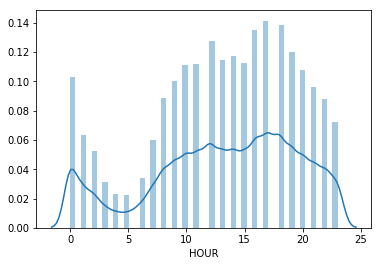

In [13]:
sns.distplot(dt['HOUR'])

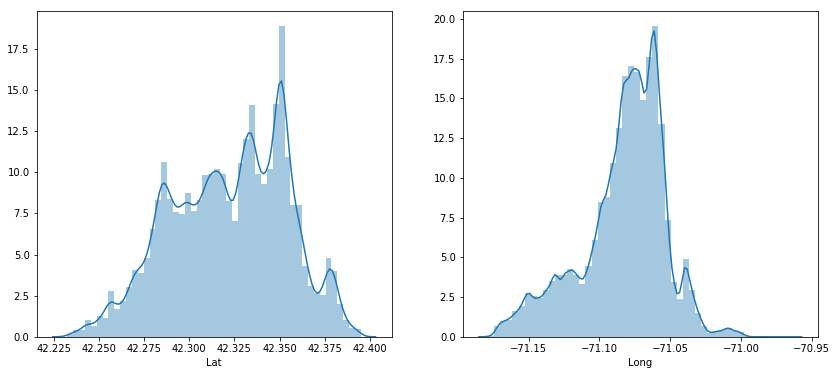

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.distplot(dt['Lat'].dropna(), ax=axes[0])
sns.distplot(dt['Long'].dropna(), ax=axes[1])
#sns.scatterplot(x=dt['Lat'].dropna(), y=dt['Long'].dropna(), hue=dt['OFFENSE_CODE_GROUP'], ax=axes[2])

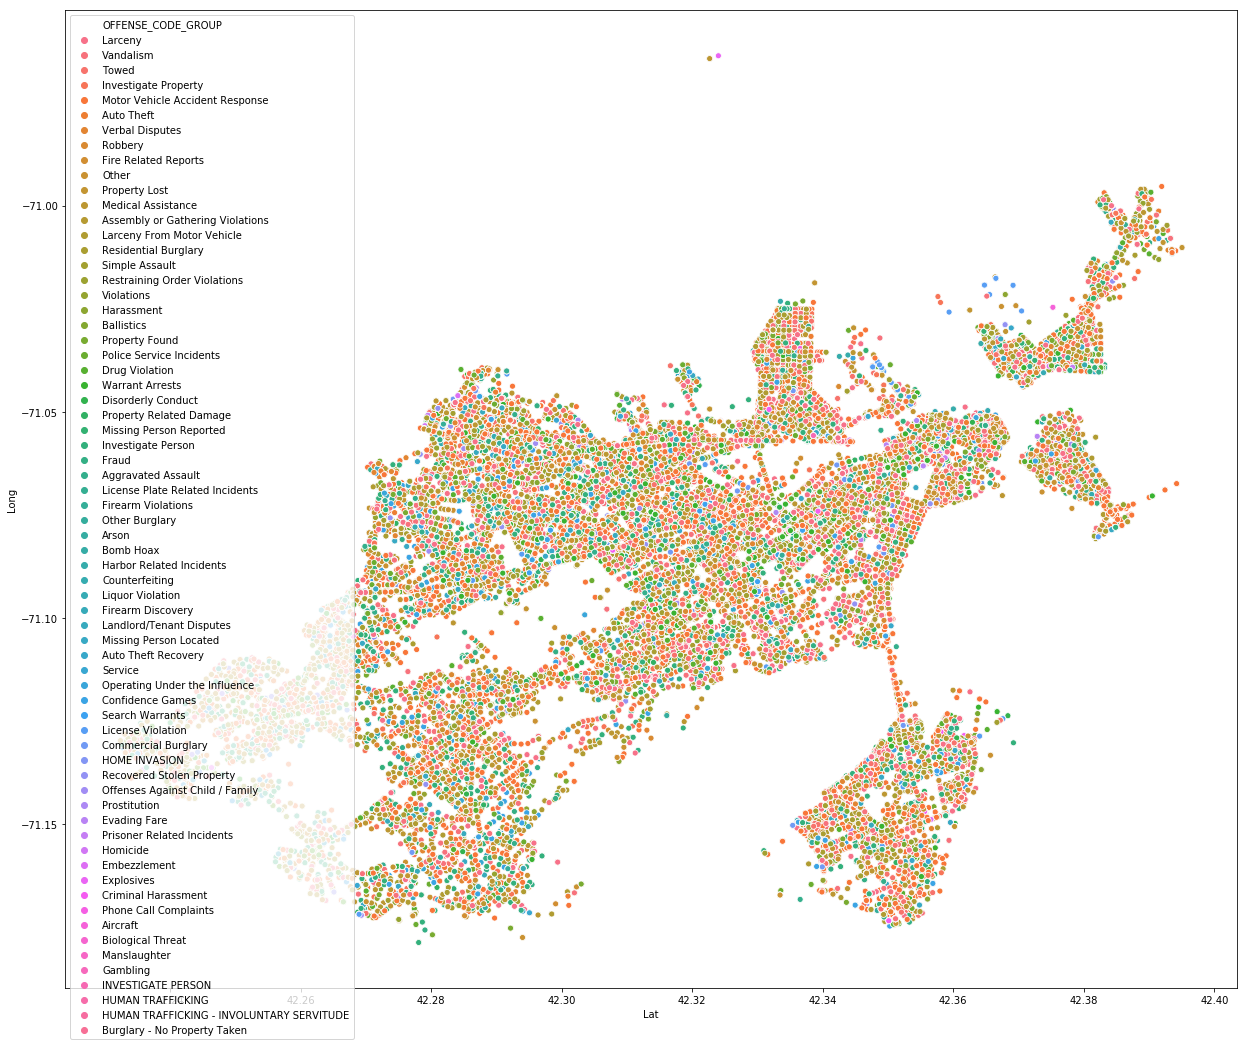

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(21, 18))
sns.scatterplot(x=dt['Lat'].dropna(), y=dt['Long'].dropna(), hue=dt['OFFENSE_CODE_GROUP'])

In [51]:
dt1=dt.merge(TOP_10, left_on="OFFENSE_CODE_GROUP", right_on="OFFENSE_CODE_GROUP", how='left')

In [52]:
dt1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT_SUM
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",25935.0
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",15415.0
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",11287.0
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",NaN
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",NaN


In [61]:
dt1['GP']=np.where(dt1['INCIDENT_SUM'].isnull(), 'the Rest', dt1['OFFENSE_CODE_GROUP'])

In [62]:
dt1[dt1['OFFENSE_CODE_GROUP']=='Investigate Property'].head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT_SUM,GP
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",NaN,the Rest
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",NaN,the Rest
11,I182070927,3114,Investigate Property,INVESTIGATE PROPERTY,C6,936,NaN,2018-09-03 20:19:00,2018,9,Monday,20,Part Three,DALESSIO CT,42.340115,-71.053390,"(42.34011469, -71.05339029)",NaN,the Rest
66,I182070860,3114,Investigate Property,INVESTIGATE PROPERTY,C11,403,NaN,2018-09-03 15:58:00,2018,9,Monday,15,Part Three,CROFTLAND AVE,42.281071,-71.069251,"(42.28107109, -71.06925083)",NaN,the Rest
102,I182070824,3114,Investigate Property,INVESTIGATE PROPERTY,B2,237,NaN,2018-09-03 13:31:00,2018,9,Monday,13,Part Three,CAWFIELD ST,42.319931,-71.063690,"(42.31993148, -71.06368978)",NaN,the Rest


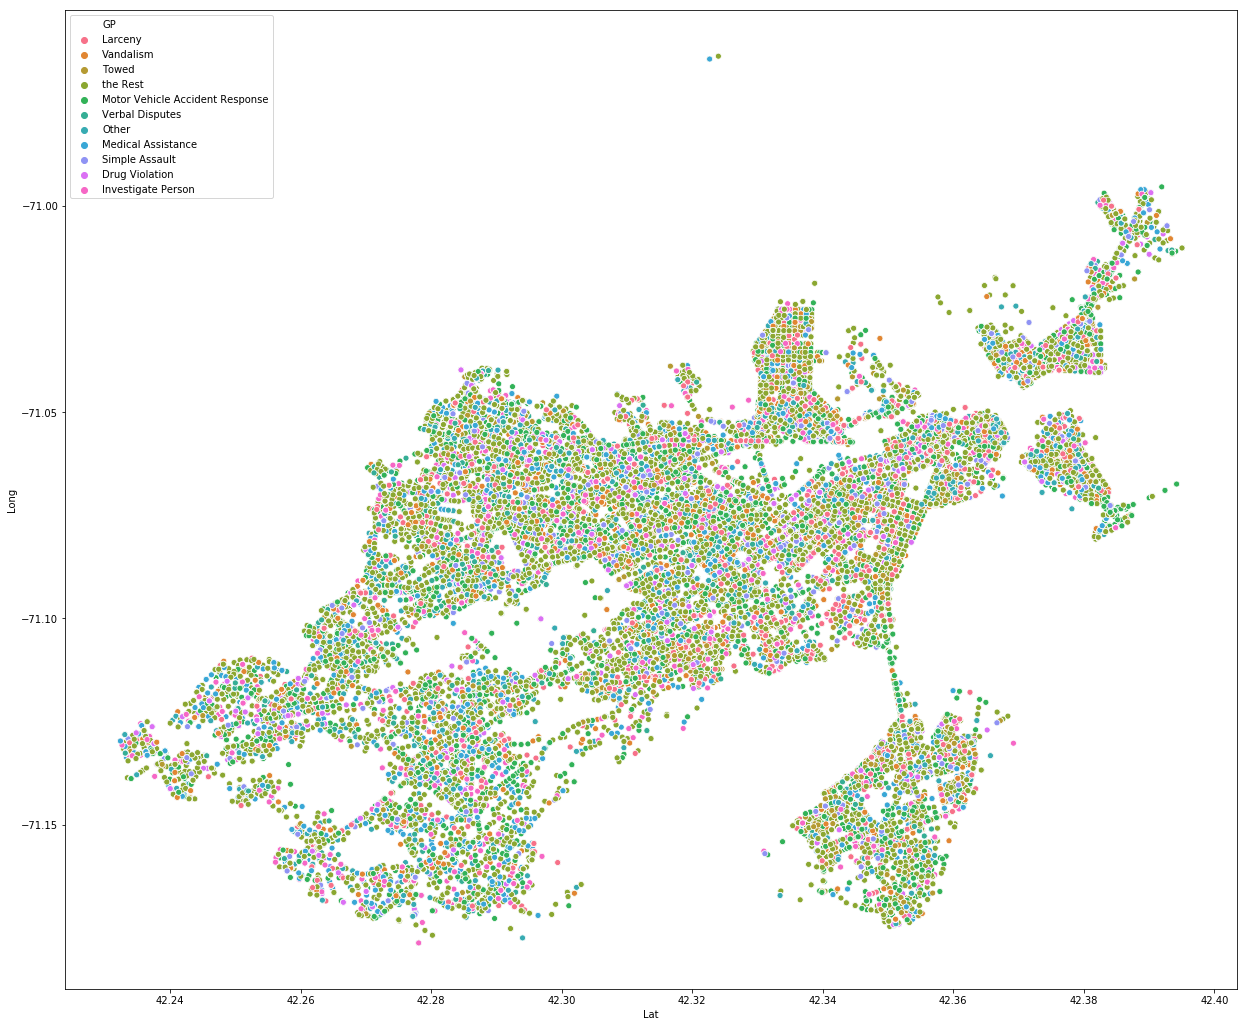

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(21, 18))
sns.scatterplot(x=dt1['Lat'].dropna(), y=dt1['Long'].dropna(), hue=dt1['GP'], legend="full")

In [72]:
#Create a data set for time series analysis
dt['datetime']=pd.to_datetime(dt['OCCURRED_ON_DATE'])
#dt[['OCCURRED_ON_DATE', 'datetime']].head().info()
dt['month_year']=pd.to_datetime(dt['OCCURRED_ON_DATE']).dt.to_period('M')

In [74]:
dt[['OCCURRED_ON_DATE', 'datetime', 'month_year']].head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
OCCURRED_ON_DATE    5 non-null object
datetime            5 non-null datetime64[ns]
month_year          5 non-null period[M]
dtypes: datetime64[ns](1), object(1), period[M](1)
memory usage: 200.0+ bytes


In [75]:
dt_time=dt.groupby(['YEAR', 'MONTH', 'month_year'])

In [88]:
#crime incident per year and month
Inc=dt_time['INCIDENT_NUMBER'].agg("count")
Incx=Inc.reset_index()
Incx=Incx.reset_index()
Incx

,index,YEAR,MONTH,month_year,INCIDENT_NUMBER
0,0,2015,6,2015-06,4191
1,1,2015,7,2015-07,8324
2,2,2015,8,2015-08,8342
3,3,2015,9,2015-09,8414
4,4,2015,10,2015-10,8308
5,5,2015,11,2015-11,7818
6,6,2015,12,2015-12,7991
7,7,2016,1,2016-01,7835
8,8,2016,2,2016-02,7308
9,9,2016,3,2016-03,8199


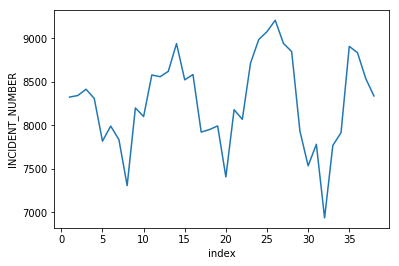

In [89]:
Incy=Incx[Incx['INCIDENT_NUMBER']>6000]
ax=sns.lineplot(x='index', y='INCIDENT_NUMBER', data=Incy)